# Project: Tmdb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset used for project**: Tmdb movie data from Kaggle.

>  **Dataset Overview**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>**Brief Description of Columns** <br>
    __id__: Identification Number <br>
    __imdb_id__: Id used on Imdb website <br>
    __Popularity__: Rating for the movie <br>
    __budget__: Total cost of producting <br>
    __revenue__: Total revenue <br>
    __original_title__: Name of the movie <br>
    __cast__: Name of the people casting in the movie <br>
    __homepage__: Website URL <br>
    __director__: Director responsible for shooting the film <br>
    __tagline__: Caption <br>
    __keywords__: words to indicate content of the movie <br>
    __overview__: Brief description of the movie <br>
    __runtime__: Duration <br>
    __genres__: Category/Categories of the movie <br>
    __production_companies__: Companies responsible for producting the movie<br>
    __release_date__: Release date in Month/Day/year format<br>
    __vote_count__: Number of votes submitted<br>
    __vote_average__: Mean of the votes <br>
    __release_year__: Year of the movie release<br>
    __budget_adj__: budget of the associated movie in terms of 2010 dollars,accounting for inflation over time<br> 
    __revenue_adj__: revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time <br>
    
>**Question Investigated**:
    <ul><li> __Which genre is most popular from year to year?__ </li>
    <li> __Does the genres have relation to the popularity?__</li>
    </ul>

In [6]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

#check the number of rows and columns
df.shape


(10866, 21)

In [5]:
#View loaded data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> The original dataset has **10866 rows** and **21 columns**. 

In [7]:
#Check for info in Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> The **budget** and **revenue** have integer as their datatype where as **budget_adj,revenue_adj** are provided as float. 

In [8]:
#View description of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.genres.value_counts()

Drama                                   712
Comedy                                  712
Documentary                             312
Drama|Romance                           289
Comedy|Drama                            280
                                       ... 
Drama|Thriller|Mystery|Music|Romance      1
Crime|Science Fiction|Thriller            1
Adventure|Action|Drama|Fantasy            1
Thriller|Horror|War                       1
Drama|Romance|Foreign|Comedy              1
Name: genres, Length: 2039, dtype: int64

> Looks like Drama and Comedy has the most number of releases throughout the years

In [9]:
#check null values for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> As we can see in the table above: **homepage** has the higest number of missing values followed by **tagline, keywords, production_companies, cast, directors, genres, imdb_id,** and **overview**. 

In [10]:
#check for the number of duplicates
df.duplicated().sum()

1

In [11]:
#check which row has been duplicated
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
#drop duplciate
df.drop_duplicates(inplace = True)

In [13]:
#Verify the duplicate has been removed
df.duplicated().sum()

0

In [14]:
#Find Number of unique values for column: genres
df.genres.nunique()

2039

## Data Cleaning 

In [15]:
(df[['budget', 'revenue', 'budget_adj', 'revenue_adj']] == 0).sum(axis=0)

budget         5696
revenue        6016
budget_adj     5696
revenue_adj    6016
dtype: int64

> more than half of __budget, revenue, budget_adj__ and __revenue_adj__ columns have '0' as their value which can be interpreted as null. 
> Considering to remove these columns from the dataset because they would create discrepancy during comparison 

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Drop the columns that won't be used for the questions - 
df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date','budget', 'revenue', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
#df.drop(['budget', 'revenue', 'budget_adj', 'revenue_adj'], axis=1, inplace = True)

> <ul>
    <li>Dropping <b>imdb_id</b> because we already have id column</li>
    <li><b>cast, homepage, director, tagline, keywords, overview, production_companies</b> and <b>release_date</b> are all string objects and won't be used in the findings and also helps in minimizing null values in the dataset</li>
  </ul>

In [17]:
#Check the table after dropouts
df.head(5)

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


In [18]:
#Find number of unique genres
df.genres.nunique()

2039

> __genres__ column have a large number of unique values which is not good for our model, 
I will take the first genre listed( first entry from those who are are separated by "|" symbol) because there are movies with more than 5 or 4,3, or 2 genres, 
splitting each id based on genre won't be consistence because one movie could have 5 while the other could have 2.
Some movies only have 1 genre listed. 

In [19]:
#Check null values after dropping the columns before performing any further operation
df.isna().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [20]:
#Since genres is the only column with null values we can drop the movies because the count is low
df.dropna(inplace=True)

In [21]:
#Confirm dropping null values 
df.isna().sum()

id                0
popularity        0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [22]:
#Peform operation to genre column so we get only 1 cateogry(first entry seprated by |) for each movie id
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [23]:
#Verify Changes
df['genres'].head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genres, dtype: object

In [24]:
#check the dtypes again before any calculations or comparison
df.dtypes, df.shape

(id                  int64
 popularity        float64
 original_title     object
 runtime             int64
 genres             object
 vote_count          int64
 vote_average      float64
 release_year        int64
 dtype: object,
 (10842, 8))

> Everything looks good after cleaning the data <br>
> Cleaned dataset has **10842 rows** and **8 columns**. 

<a id='eda'></a>
## Exploratory Data Analysis and Conclusions

> I have plotted graphs for my findings and included the conclustions with them

### Which genre is most popular from year to year?

> Check histogram for each variable in the table

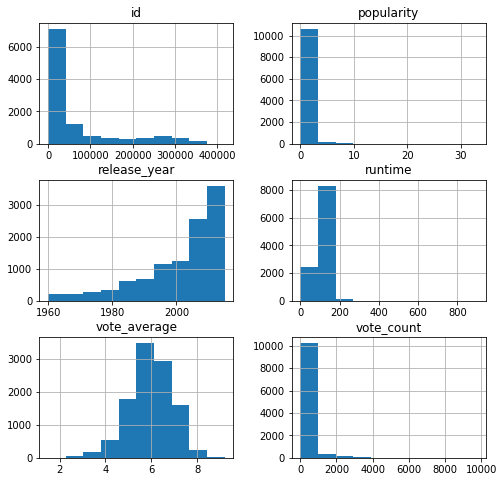

In [25]:
#Histogram for each variable
df.hist(figsize=(8,8));

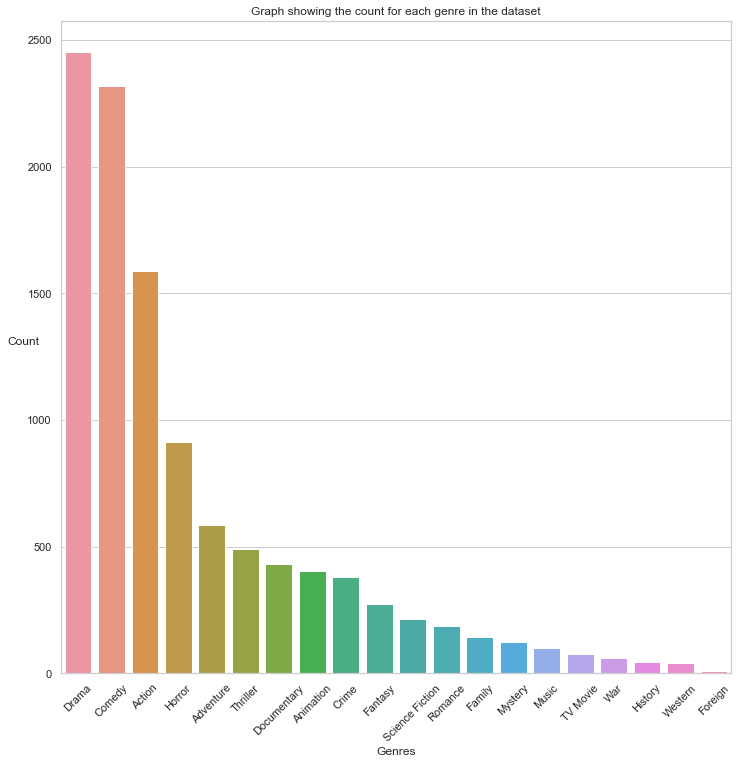

In [26]:
sns.set(style='whitegrid')

#size of the graph
plt.figure(figsize=(12,12))

#assign columns to the type of graph we want
# df.genres.value_counts().index : shows all the names for genres
# df.genres.value_counts() : the number of count for each genre
sns.barplot(df.genres.value_counts().index, df.genres.value_counts())

#changing the rotation of tick labels
plt.xticks(rotation=45)

#Assign title and labels for each of the axis
plt.xlabel('Genres')
plt.ylabel('Count', rotation=0)
plt.title('Graph showing the count for each genre in the dataset');
#plt.legend(loc=8);

> In out dataset, Drama has the highest number of counts followed by comedy, action and so on. 

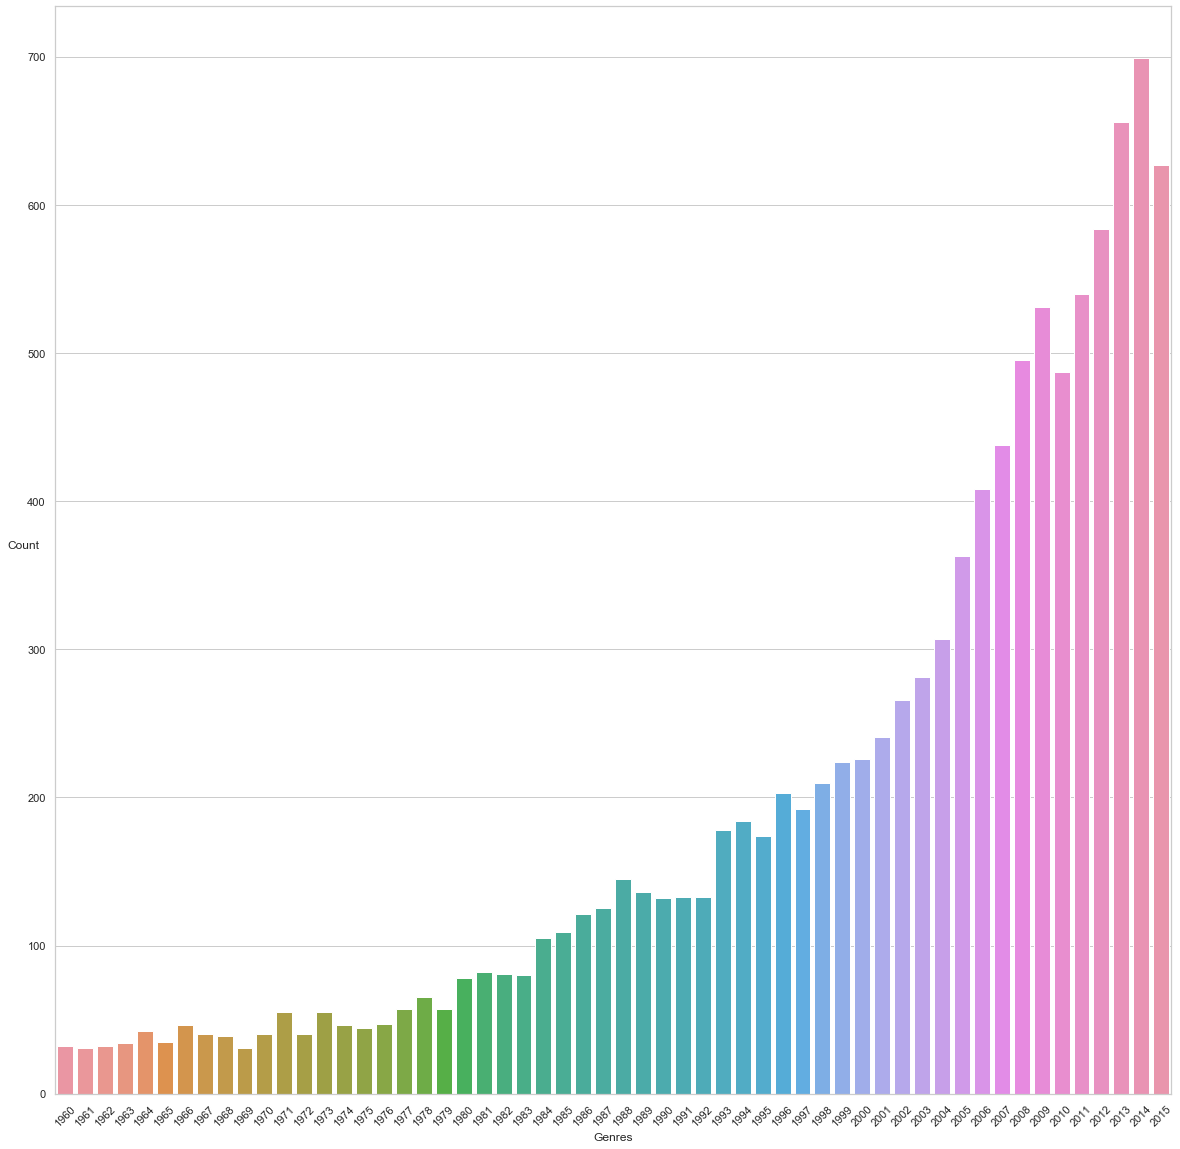

In [27]:
sns.set(style='whitegrid')

#size of the chart is 20,20 because ther are many number of years in the datasete
plt.figure(figsize=(20,20))
#assign columns to the type of graph we want
# df.release_year.value_counts().index : Represents the year
# df.release_year.value_counts : how many times the year is repeated
sns.barplot(df.release_year.value_counts().index, df.release_year.value_counts())

#rotating the label on x-axis for better visibility 
plt.xticks(rotation=45)

#labels for each of the axis
plt.xlabel('Genres')
plt.ylabel('Count', rotation=0);

> Since there are many years in the dataset, it is better to divide it into 2 parts, **19th** and **20th** century for better representation of the graphs

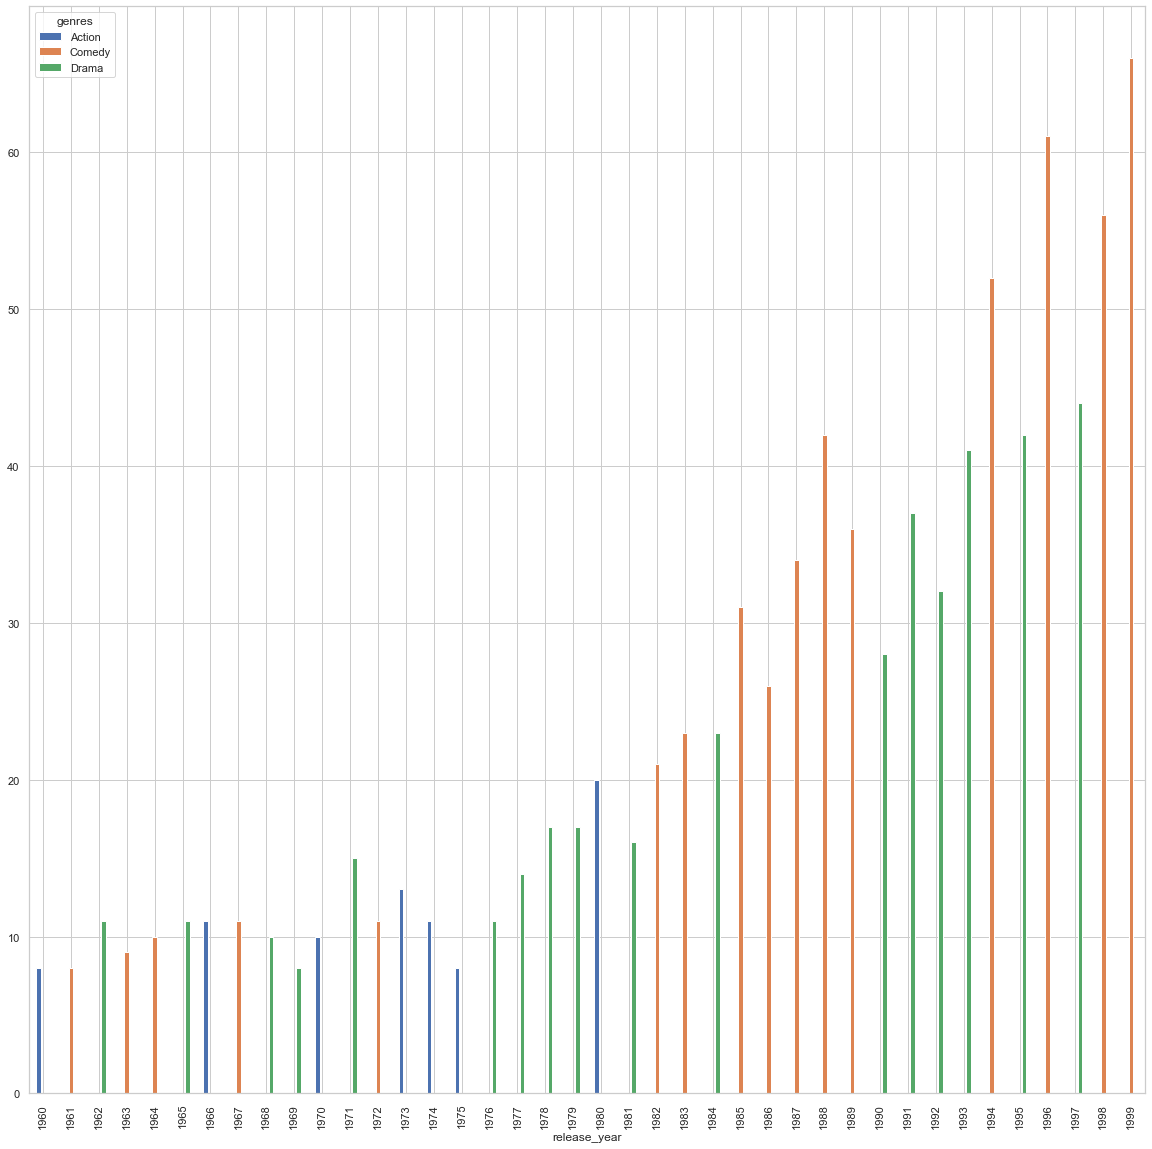

In [28]:
#Query to collect all the years in 19th century
century_19 = df.query('release_year < 2000')

#creating a temporary variable for each year in 19th century and sorting them by value counts of genres
temp_19 = century_19.groupby('release_year').genres.value_counts()

#create a new table using the temp_19 variable to find the pick the highest count of genre for each year
df_19 = (temp_19.reset_index(name='count').drop_duplicates('release_year').pivot('release_year','genres','count'))

# function plot for visualization with a figure size 20
def figure_20(x):
    x.plot.bar(figsize=(20,20))

#visualize 
figure_20(df_19)

> The graph shows the most popular genre for each year from 1960 - 1999. **Comedy** has the most number of releases in the 19th century where the highest count is around **65**. <br>
> The trends of movies release per year has been significantly increased with each year.

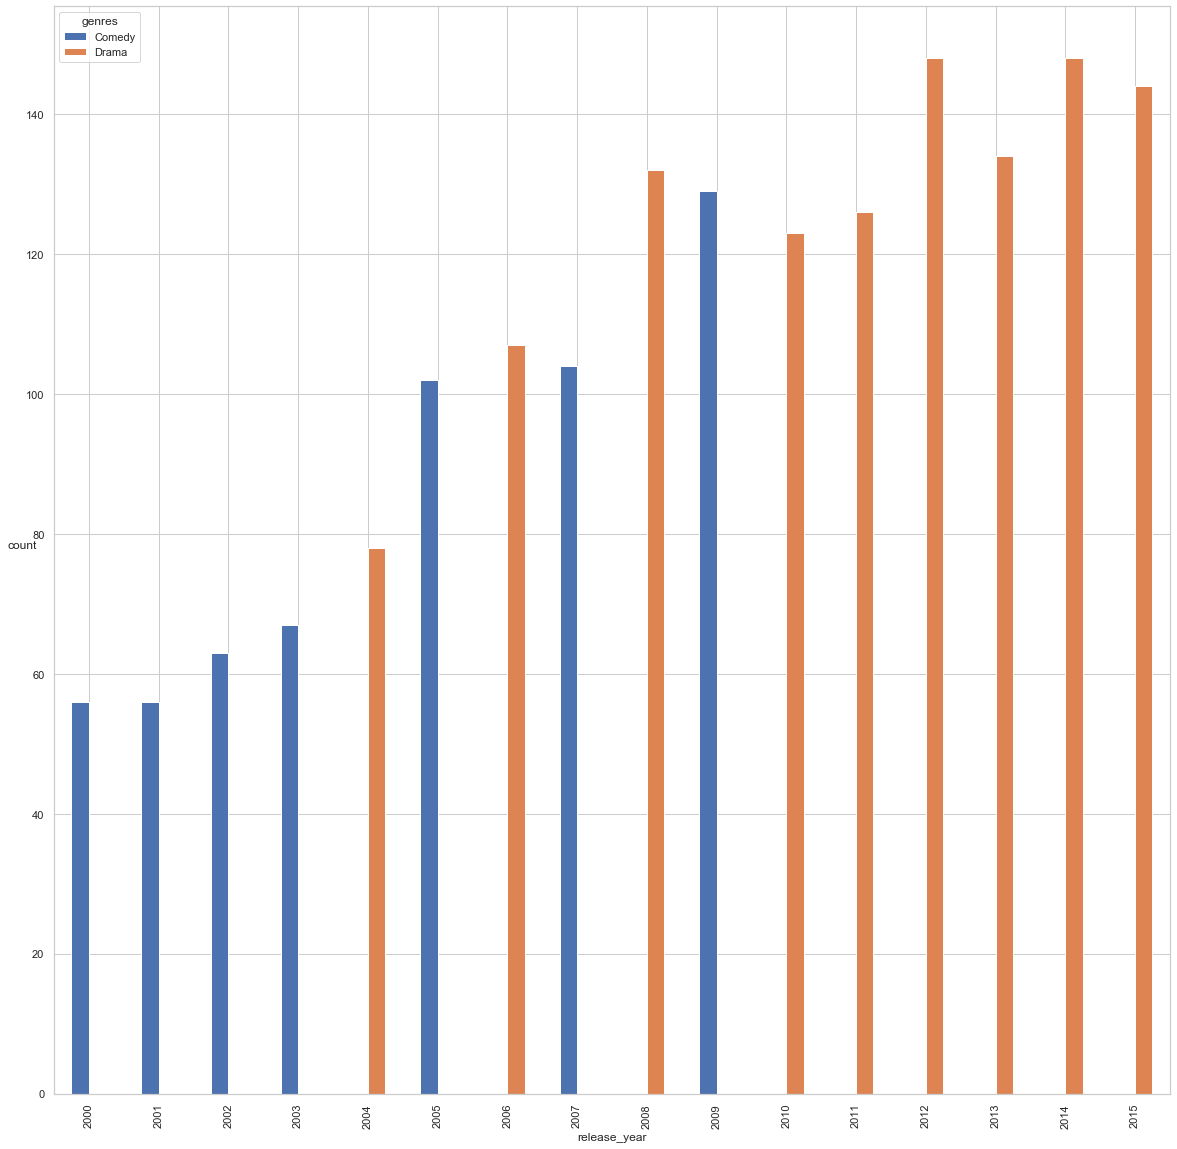

In [30]:
#Query to collect all the years in 20th century
decade_20 = df.query('release_year >= 2000')

#creating a temporary variable for each year in 20th century and sorting them by value counts of genres
temp_20 = decade_20.groupby('release_year').genres.value_counts()

#create a new table using the temp_20 variable to find the pick the highest count of genre for each year
df_20 = (temp_20.reset_index(name= 'count').drop_duplicates('release_year').pivot('release_year','genres','count'))

# call function for Visualization
figure_20(df_20)

#customize the chart
plt.ylabel('count', rotation=0)
plt.legend(title='genres', loc='upper left');

> Here **Drama** genre has beaten **comedy** substantially. People started liking Drama over Comedy, that's why the genre has increased in count.  <br>
> The number of movie release per year trend from **19th century** seems to applicable here till **2011**. <br>
> Also, the number of movie releases per year seems to be stable from the year **2012**. 

## In the timeline, what genre has got the most popularity?

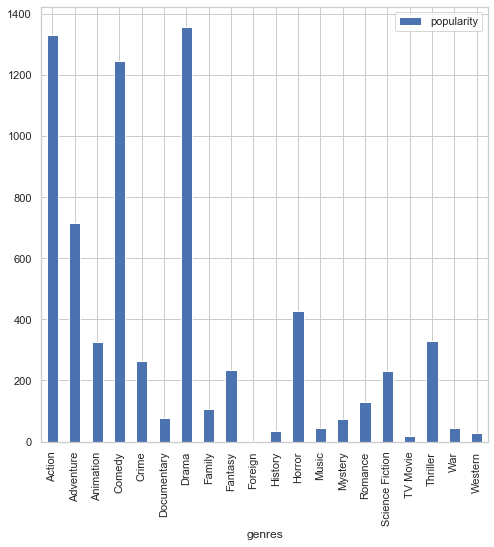

In [31]:
#create a new table showing the sum of the popularity for each genre. 
df_popularity = df.groupby('genres').popularity.sum().reset_index()

#visualization
df_popularity.plot(x='genres', y ='popularity', kind='bar', figsize=(8,8));

> With our previous findings, we can verify that **Drama** and **Comedy** are the most popular genres. **Action** is 3rd best

## What is the average runtime for each genre? 

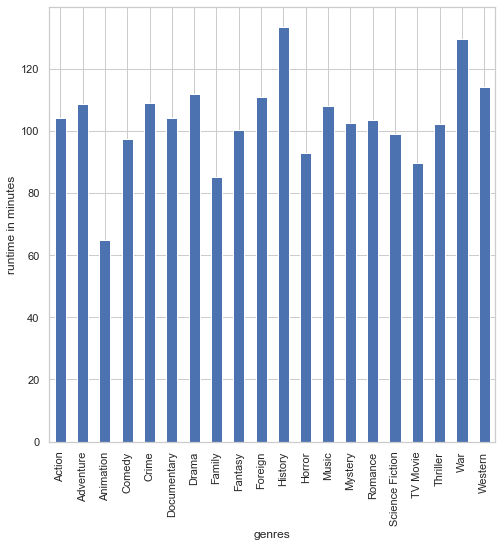

In [32]:
#for each genre, calculating the average runtime and plotting the graph
df.groupby('genres').runtime.mean().plot(x='genres', y ='runtime', kind='bar', figsize=(8,8));
plt.ylabel('runtime in minutes');

> Looks like **History, War and western** movies have the longest running duration. 

## Conclusions
> The dataset has quite number challenges, I had to do get rid of lot of columns like tagline, overview, homepage because they were mostly strings with description which does not help in analyzing. <br> <br>
> Columns like budget, revenue and adjusments had a lot of null and '0' values(around 60% approx). I would have definitely used them for exploratory data analysis if the values were provided or only a few were missing. Using some satistics operations to alter the '0' values is not justifiable. <br> <br>
>  Drama and Comedy have shown dominace throughtout our findings. <br> <br>
> Overall the graphs shows the the entertainment/movie industry have shows huge progression, people engagement has increased.  
> Other variables I could have used: <ul>
    <li>'director' - something like most number of releases or average releases per year. </li>
    <li> Could have used a combination of genres but it would have increased the instances for genres, making it hard to visualize </li>
    <li> 'vote_count' and 'vote average' are good variables to have good relation to find popularity and interest of genres
    </ul> <br> <br>
